<a href="https://colab.research.google.com/github/kdemertzis/EKPA/blob/main/CyberThreatHunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-838789246.py:39: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)



Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



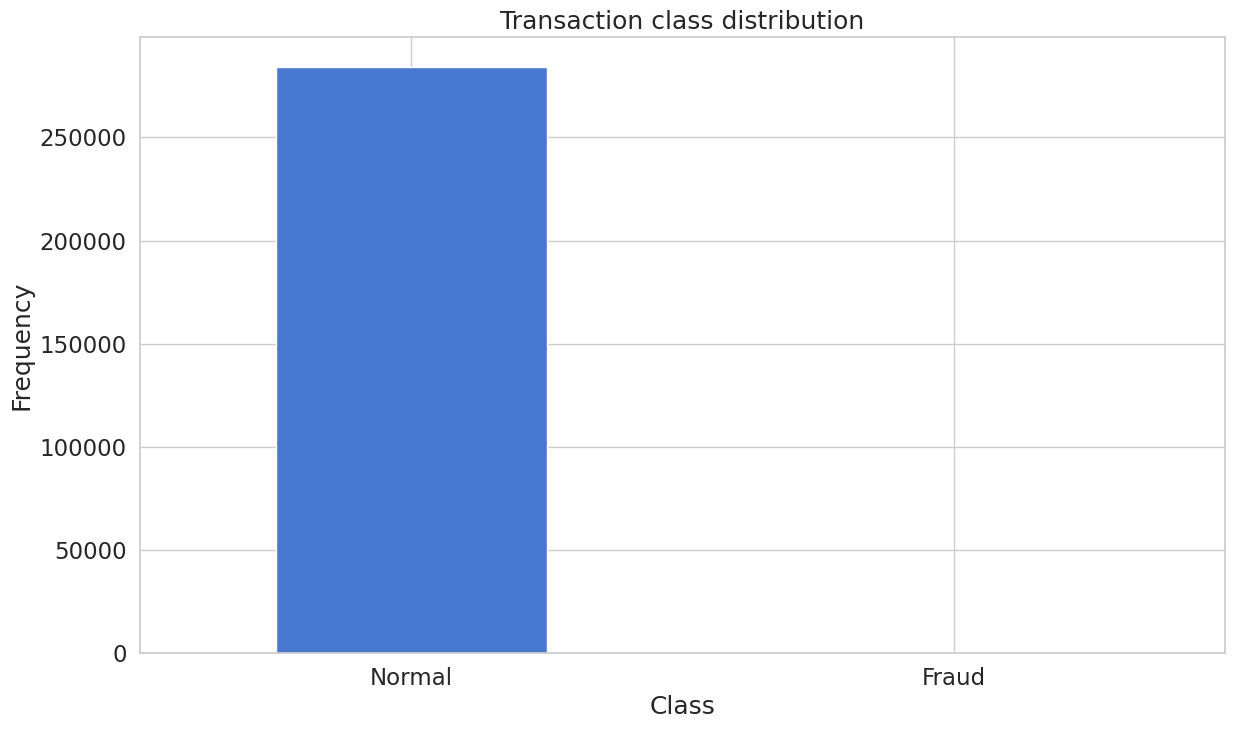

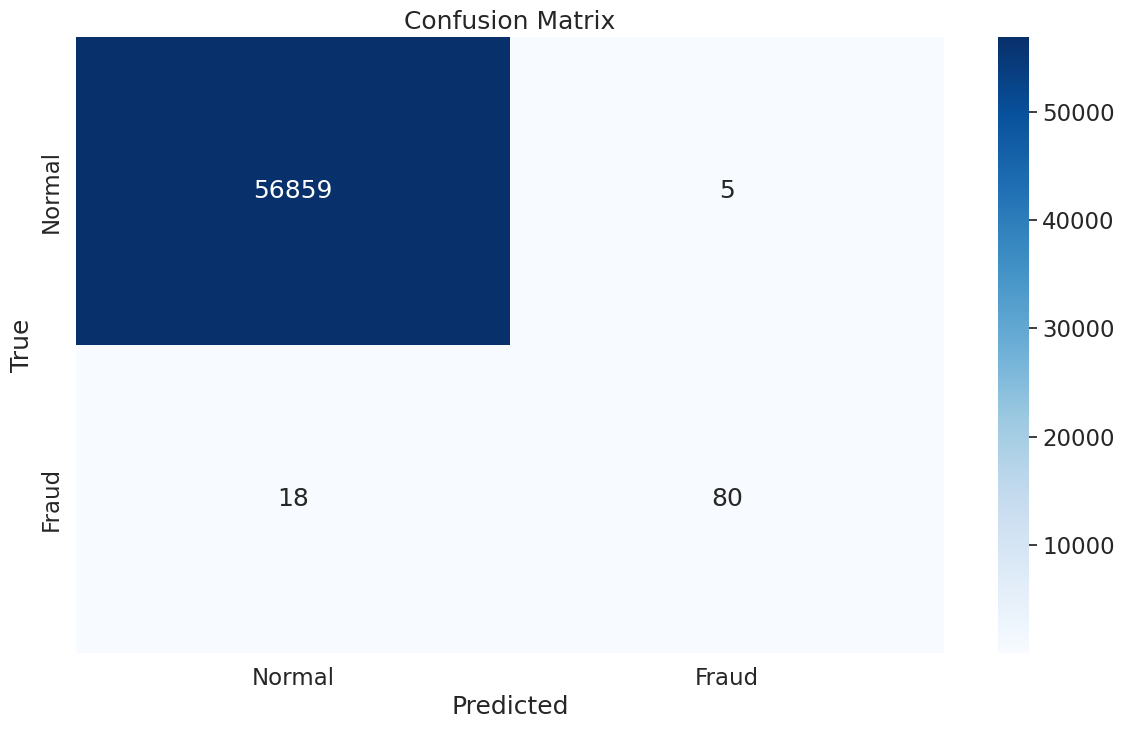

In [1]:

# φόρτωση βιβλιοθηκών
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

# έλεγχος κατανομής κλάσεων
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

# φόρτωση συνόλου δεδομένων
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
data = pd.read_csv(url)

# διαγραφή κενών ή μη αριθμητικών τιμών
data = data.select_dtypes(include=['float64', 'int64']).dropna()

# διαχωρισμός ανεξάρτητων και εξαρτημένων μεταβλητών
y = data['Class']              # εξαρτημένη μεταβλητή (Class)
x = data.drop('Class', axis=1) # ανεξάρτητες μεταβλητές

# διαχωρισμός συνόλου δεδομένων σε σύνολο εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.20,            # 20% για δοκιμές
    random_state = RANDOM_SEED,  # για επαναληψιμότητα
    stratify = y                 # διατήρηση αναλογίας κλάσεων
)

# κατανομή της εξαρτημένης μεταβλητής (class)
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

# δημιουργία Random Forest αλγορίθμου
model = RandomForestClassifier(random_state=RANDOM_SEED)

# εκπαίδευση αλγόριθμου
model.fit(X_train, y_train)

# πρόβλεψη συνόλου δοκιμής
y_pred = model.predict(X_test)

# υπολογισμός μετρικών αξιολόγησης (accuracy, precision, recall, f-score, confusion matrix)
accuracy = accuracy_score(y_test, y_pred)          # accuracy

# αναλυτική αναφορά (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=LABELS))

# οπτικοποίηση confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=rcParams['figure.figsize'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
